In [1]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24
%cd DS4B_Sp24/ds_utils/data/

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 725, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 725 (delta 55), reused 126 (delta 55), pack-reused 598
Receiving objects: 100% (725/725), 132.06 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (318/318), done.
Updating files: 100% (126/126), done.
/content/DS4B_Sp24/ds_utils/data


# Data Visualization


**Spring 2024 - Instructor:  Chris Volinsky**

**Teaching Assistants: Aditya Deshpande, Stuti Mishra, Krutika Savani**

***

This notebook contains code adapted from [the book](https://www.wiley.com/en-us/Data+Mining+for+Business+Analytics%3A+Concepts%2C+Techniques+and+Applications+in+Python-p-9781119549840):

**"Data Mining for Business Analytics: Concepts, Techniques and Applications in Python"** by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel
Chapter 3 - Data Visualization

*Minor modifications have been made to align with updated libraries.*


## Data
We're going to use the Boston Housing dataset which contains information on census tracts in Boston. Dataset is located in `DS4B_Sp24/ds_utils/data/`. Each record (row) represents data for a specific town or neighborhood in Boston.


The columns (features) are:

```
1.CRIM (Crime Rate): Represents the crime rate in the area.
2.ZN (Residential Zone Percentage):Indicates the percentage of residential land zoned for large lots (over 25,000 sq. ft).
3.INDUS (Non-Retail Business Percentage): Represents the percentage of land occupied by non-retail businesses.
4.CHAS (Charles River Indicator):A binary flag indicating whether the tract bounds the Charles River (1 if yes, 0 otherwise).
5.NOX (Nitric Oxide Concentration):Measures the concentration of nitric oxide in parts per 10 million.
6.RM (Average Number of Rooms):Represents the average number of rooms per dwelling.
7.AGE (Percentage of Older Units): Indicates the percentage of owner-occupied units built prior to 1940.
8.DIS (Weighted Distances to Employment Centers):Represents the weighted distances to five Boston employment centers.
9.RAD (Accessibility to Highways):An index indicating the accessibility to radial highways.
10.TAX (Property Tax Rate): Indicates the full-value property tax rate per $10,000.
11.PTRATIO (Pupil-to-Teacher Ratio):Represents the ratio of pupils to teachers in the area.
12.LSTAT (Percentage of Lower Status Population):Indicates the percentage of the population with lower socioeconomic status.
13. MEDV (Median Home Value): Represents the median value of owner-occupied homes in $1000s.
14. CAT.MEDV (Categorical Median Home Value):A binary variable indicating whether the median home value is above $30,000 (CAT.MEDV = 1) or not (CAT.MEDV = 0).

```

These features provide a comprehensive overview of various factors that can influence the median home value in different areas within Boston. The target variable is `CAT.MEDV`, which categorizes the median home value into two classes based on the $30,000 threshold.

Importing all the packages we need

In [2]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [3]:
housing_df = pd.read_csv('BostonHousing.csv')
# rename CAT. MEDV column for easier data handling
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


## Basic Charts: Bar Charts, Line Graphs, and Scatter Plots


### Bar Charts:
- **Purpose:** Useful for comparing a single statistic (average, count, percentage) across different groups.
- **Representation:** The height of the bar (or length in a horizontal display) represents the value of the statistic.
- **Examples:**
  - **Numerical Variable:** Displays a bar chart for the numerical variable MEDV. The y-axis represents the average MEDV, and separate bars compare homes near and not near the Charles River (CHAS).
  - **Categorical Variable:** Displays a bar chart for the categorical variable CAT.MEDV. The y-axis shows the percentage of tracts with median values above $30K, and bars compare tracts bordering the Charles to those that do not.

### Scatter Plots:
- **Purpose:** Essential for examining relationships between two numerical variables.
- **Representation:** Each point on the plot represents an observation with coordinates determined by the values of the two numerical variables.
- **Example:** Scatter plot of MEDV vs. LSTAT. The y-axis shows MEDV, and the x-axis displays LSTAT. Useful for predictive tasks, studying associations, and identifying clusters of observations.

General Note:
- **X-axis Usage:** In bar charts, the x-axis is reserved for categorical variables. For scatter plots, both x and y axes are numerical.


These visualizations play a crucial role in understanding and interpreting data, providing insights into patterns, trends, and relationships within the dataset.

Pandas Version

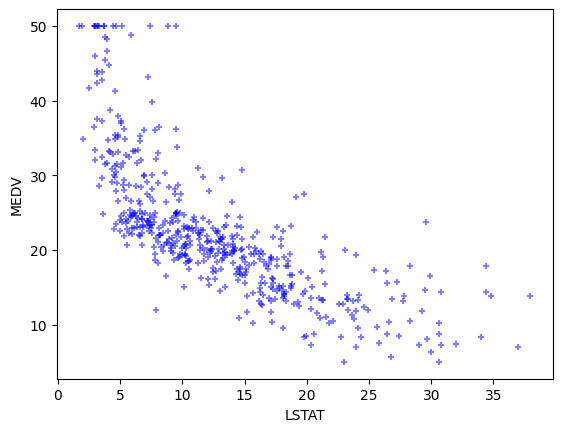

In [21]:
## scatter plot with axes names
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False,color='blue',alpha=0.5,marker="+")
plt.show()

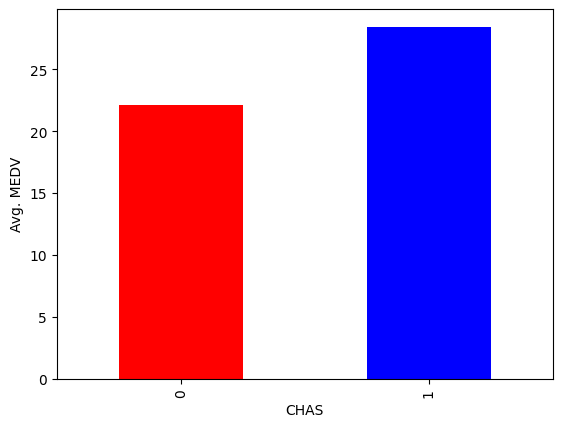

In [5]:
## barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar', color = ['red','blue'])
ax.set_ylabel('Avg. MEDV')
plt.show()

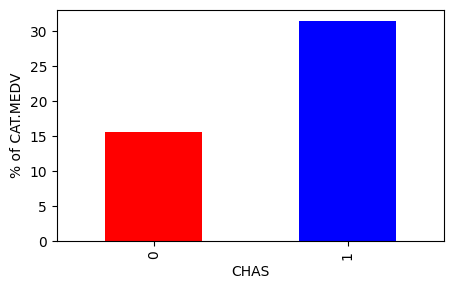

In [6]:
## barchart of CHAS vs. CAT_MEDV
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 3], color = ['red','blue'])
ax.set_ylabel('% of CAT.MEDV')
plt.show()

### Distribution Plots : Boxplots and Histograms


### Histograms:
- **Representation:** Consists of vertical connected bars, where each bar represents the frequency of x values within a specific range.
- **Example** Illustrates over 150 tracts with median values (MEDV) between $20K and $25K.
- Reveals a skewed distribution of MEDV, suggesting a potential transformation like log(MEDV) for improved linear regression predictions.

### Boxplots:
- **Representation:** Displays the variable on the y-axis, with boxes representing quartiles and other statistical measures.

- **Key Elements:**
  - Box: Encloses 50% of the data, with the median represented by a horizontal line.
  - Lines above and below the box cover the rest of the data range; outliers may be depicted.
  - Average and median comparison helps assess data skewness.
- **Example** Highlights differences in the distribution of MEDV for river-bounding and non-river-bounding homes. Useful for identifying the importance of the predictor (CHAS) and guiding the choice of data mining methods.

### Deriving New Variables:
- Boxplots and histograms applied to numerical variables can guide the derivation of new variables.
- Examples include binning a numerical outcome for use in a naive Bayes classifier or choosing a cutoff to convert MEDV to CAT.MEDV in the Boston Housing example.

Both histograms and boxplots play essential roles in visually representing the distribution and relationships of numerical variables, supporting tasks such as prediction and unsupervised learning.

Text(0.5, 0.98, 'Histogram of MEDV')

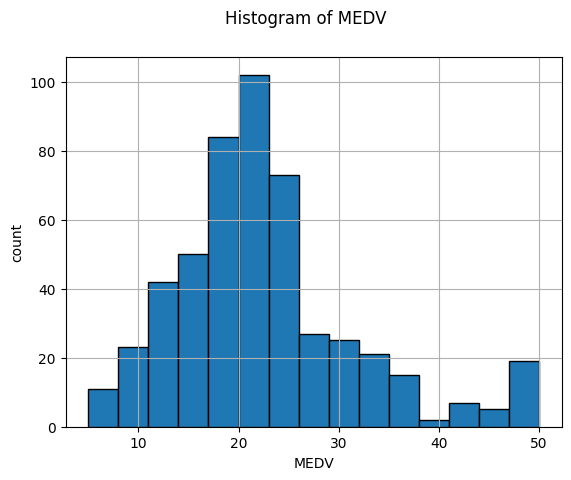

In [7]:
## histogram of MEDV
ax = housing_df.MEDV.hist(ec='black',bins=15)
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.suptitle("Histogram of MEDV")  # Suppress the titles
# play with edgecolor, bins, etc.


In [8]:
housing_df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

Text(0.5, 1.0, '')

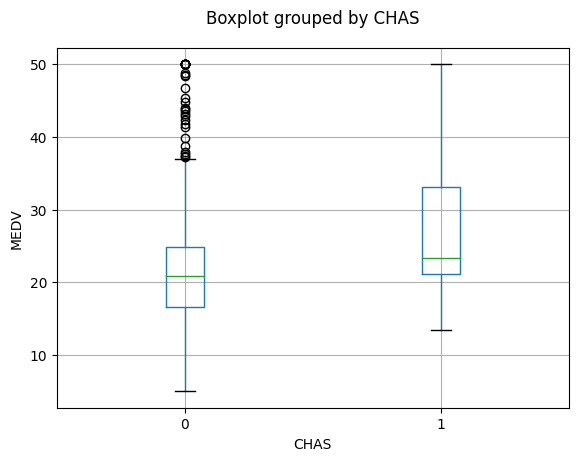

In [9]:
## boxplot of MEDV for different values of CHAS
ax = housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_ylabel('MEDV')
plt.title("")

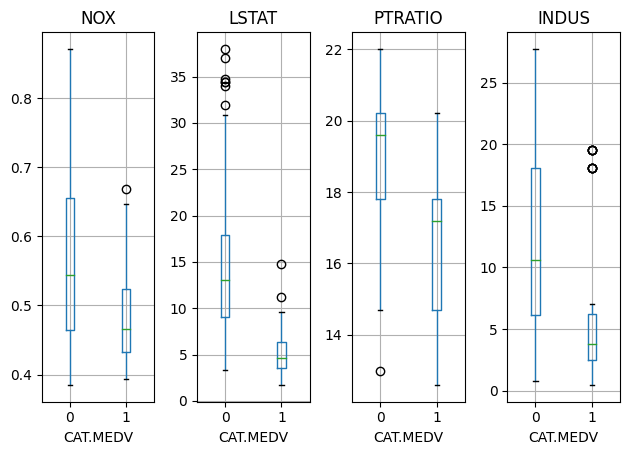

In [10]:
## side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle("")  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots, avoid overplotting

### Heatmaps: Visualizing Correlations

**Structure:**
- A correlation table for p variables has p rows and p columns.
- Represents all pairwise correlations between variables.

**Color Coding:**
- Darker shades indicate stronger (positive or negative) correlations.
- Easier and faster to interpret than scanning numerical values.

Example:
- Displays pairwise correlations between 13 variables (MEDV and 12 predictors).
- Blue/red colors highlight positive vs. negative correlations.

<Axes: >

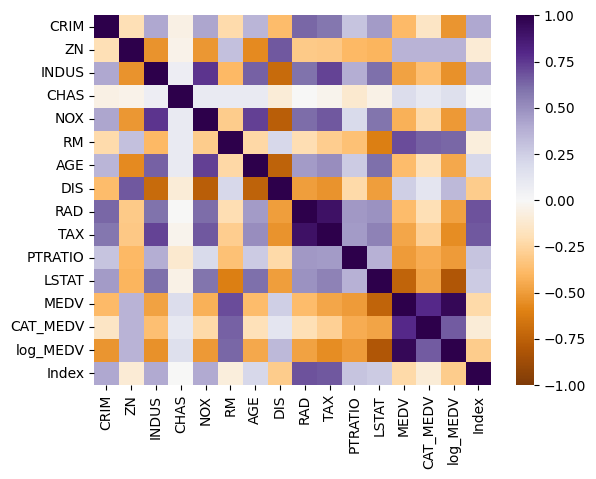

In [27]:
## simple heatmap of correlations (without values)
corr = housing_df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# lets make the plot more visually appealing
# Change the colormap to a divergent scale (by uncommenting the line below) and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="PuOr")

<Axes: >

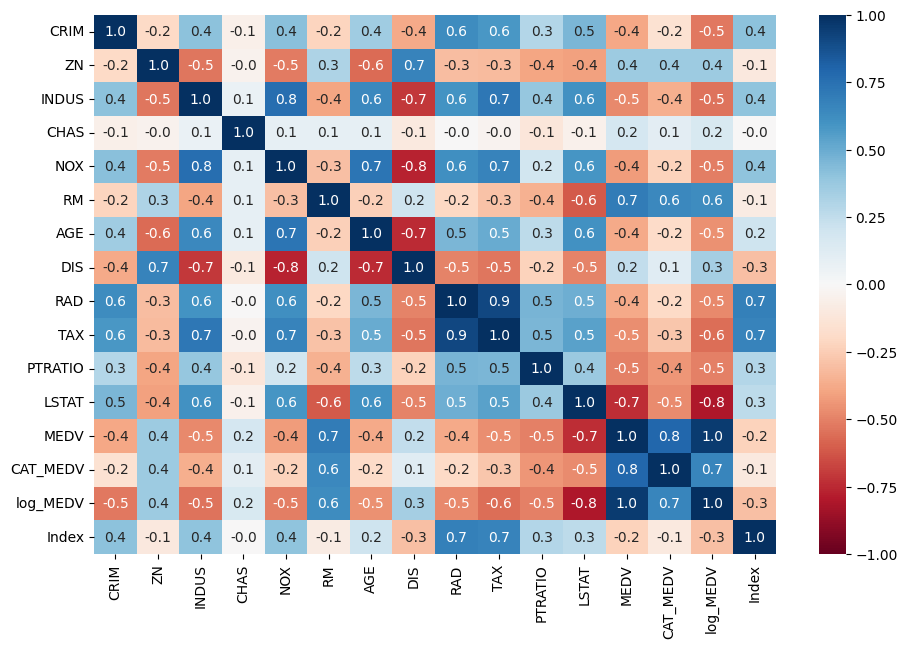

In [24]:
# Include information about values (example demonstrate how to control the size of
# the plot
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax, vmin=-1, vmax=1)

### Multidimensional Visualisation

The enhancement of basic plots by incorporating features such as color, size, and multiple panels. These additions allow for the visualization of more than one or two variables at a time, providing a richer understanding of complex information.

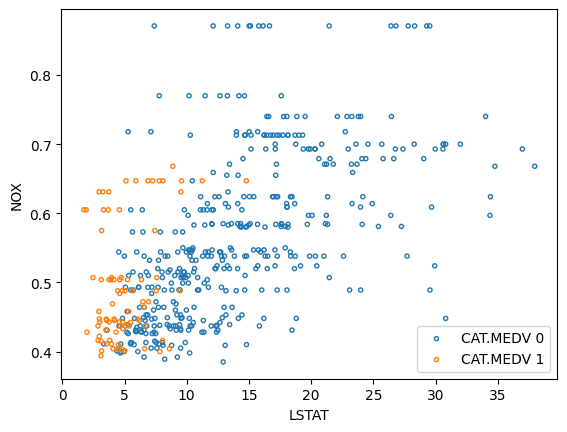

In [13]:
# Plot first the data points for CAT.MEDV of 0 and then of 1
# Setting color to 'none' gives open circles
_, ax = plt.subplots()
for catValue, color in (0, 'C0'), (1, 'C1'):
  subset_df = housing_df[housing_df.CAT_MEDV == catValue]
  ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color,marker='.')
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])
plt.show()

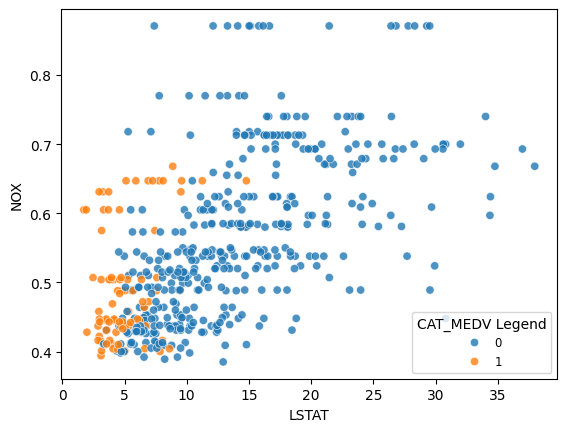

In [14]:
# Similar plot using Seaborn

# Color the points by the value of CAT.MEDV

# use alpha instead of open circles
scatter_plot = sns.scatterplot(data=housing_df, x='LSTAT', y='NOX', hue='CAT_MEDV', palette=['C0', 'C1'], alpha=0.8)

# Adding legend
scatter_plot.legend(title='CAT_MEDV Legend', fontsize='small', loc='lower right')

plt.show()


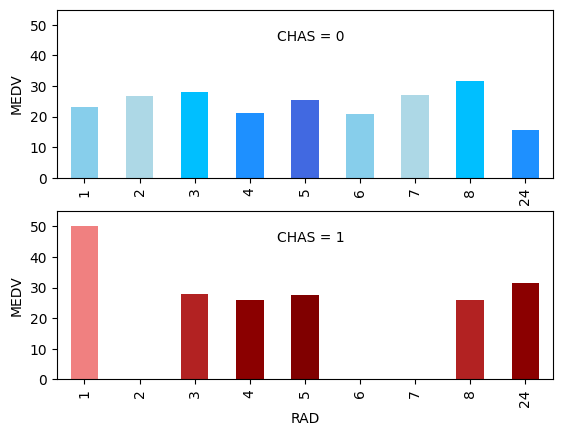

In [15]:
## panel plots
# compute mean MEDV per RAD and CHAS
dataForPlot_df = housing_df.groupby(['CHAS','RAD']).mean()['MEDV']
# We determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(dataForPlot_df[i].index):
        dataForPlot_df.loc[(i, t)] = 0
# reorder to rows, so that the index is sorted
dataForPlot_df = dataForPlot_df[sorted(dataForPlot_df.index)]
# Determine a common range for the y axis
yRange = [0, max(dataForPlot_df) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
# Custom colors for each bar in the first bar graph (CHAS=0)
colors_chas0 = ['skyblue', 'lightblue', 'deepskyblue', 'dodgerblue', 'royalblue']
dataForPlot_df[0].plot.bar(x='RAD', ax=axes[0], ylim=yRange, color=colors_chas0)

# Custom colors for each bar in the second bar graph (CHAS=1)
colors_chas1 = ['lightcoral', 'indianred', 'firebrick', 'darkred', 'maroon']
dataForPlot_df[1].plot.bar(x='RAD', ax=axes[1], ylim=yRange, color=colors_chas1)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
axes[0].set_ylabel('MEDV')
axes[1].set_ylabel('MEDV')
plt.show()

A special plot that uses scatter plots with multiple panels is the **scatter plot matrix**. In it, all pairwise scatter plots are shown in a single display. The panels in a matrix scatter plot are organized in a special way, such that each column and each row correspond to a variable, thereby the intersections create all the possible pairwise scatter plots.

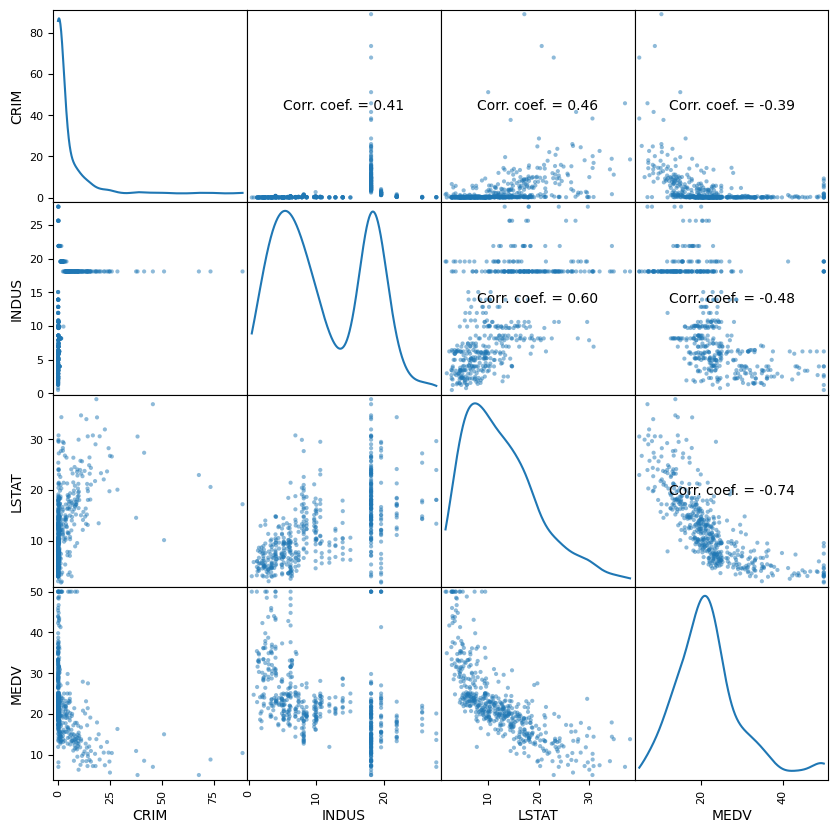

In [16]:
# Display scatterplots between the different variables
# The diagonal shows the distribution for each variable
df = housing_df[['CRIM', 'INDUS', 'LSTAT', 'MEDV']]
axes = pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 10), diagonal='kde')
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate(f'Corr. coef. = {corr[i, j]:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
plt.show()
#check out INDUS!!

### Manipulations

**Rescaling**:
Changing the scale in a display can enhance the plot and illuminate relationships. For example, we see the effect of changing both axes of the scatter plot (top) and the y-axis of a boxplot (bottom) to logarithmic (log) scale. Whereas the original plots are hard to understand, the patterns become visible in log scale.

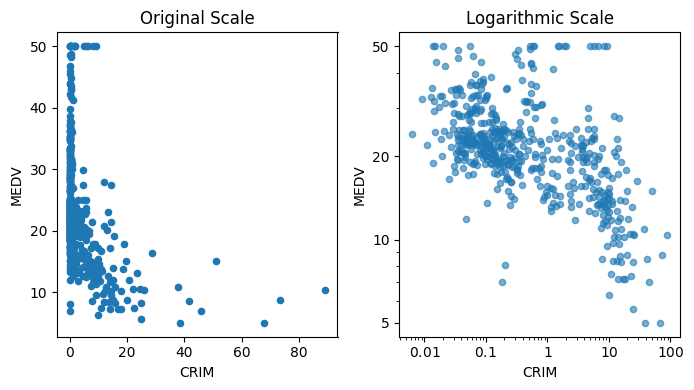

In [17]:
# Avoid the use of scientific notation for the log axis
plt.rcParams['axes.formatter.min_exponent'] = 4
## scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])
axes[0].set_title("Original Scale")

# log scale
ax = housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1],alpha=0.6)
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
axes[1].set_title("Logarithmic Scale")

plt.tight_layout(); plt.show()

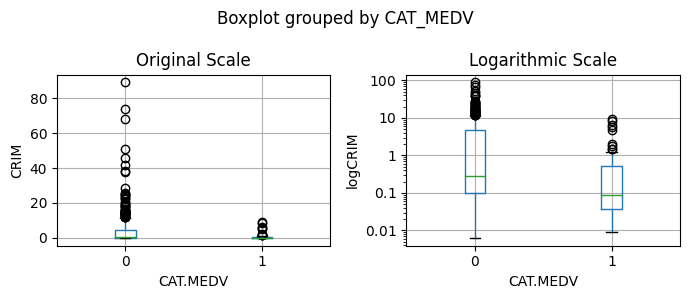

In [18]:
## boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
# regular scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')
# log scale
ax = housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('logCRIM'); ax.set_yscale('log')
# suppress the title
axes[0].set_title("Original Scale")
axes[1].set_title("Logarithmic Scale")

plt.tight_layout(); plt.show()

## Outliers and Interactive plots
**What is an outlier?**

* An outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.
* Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph.

**Why is outlier identification important?**

Identifying outliers is crucial for ensuring data accuracy, as they may indicate errors or anomalies. Outliers can significantly impact model performance and violate statistical assumptions, affecting the reliability of insights drawn from the data. Addressing outliers improves model robustness, supports accurate interpretations, and enhances the overall quality of data-driven analyses.

---


*In simpler terms, Identifying outliers is like finding the strange or unusual things in a group of data. Outliers are important to notice because they can change how we understand and predict things.*

In [19]:
import plotly.express as px
# Add a log-transformed column for MEDV
housing_df['log_MEDV'] = np.log(housing_df['MEDV'])
#Adding a new column for index
housing_df['Index'] = housing_df.index


# Create an interactive scatterplot using plotly
fig = px.scatter(housing_df,  x='CRIM', y='log_MEDV', log_x= True, title='CRIM vs. MEDV Interactive Scatterplot',
                 hover_data={
                             'log_MEDV': ':.2f',  # Customize hover for log(MEDV)
                             'LSTAT': ':.2f',  # Add LSTAT to hover data with customized formatting
                             'Index': True
                             },)


# Customize layout
fig.update_layout(
    xaxis_title='log(CRIM)',
    yaxis_title='log(MEDV)',
)
fig.update_layout(height=500)

# Display the interactive scatterplot
fig.show()


### Scatter Plot Column Facets
This code generates an interactive scatterplot that visualizes the relationship between the logarithm of the crime rate and the logarithm of the median home value, **faceted by the 'CHAS' variable**. The color of the points represents the LSTAT (Percentage of Lower Status Population). Additional information is displayed on hover, including the logarithm of the median value, the percentage of lower status, and the row number (index).

In [20]:

# Create an interactive scatterplot using plotly with customized colors (showcasing usage of facet scatter plots)
fig = px.scatter(housing_df, x='CRIM', y='log_MEDV', log_x= True,facet_col='CHAS', color='LSTAT',
                 hover_data={'CHAS': False,  # Remove CHAS from hover data
                             'log_MEDV': ':.2f',  # Customize hover for log(MEDV)
                             'LSTAT': ':.2f',  # Add LSTAT to hover data with customized formatting
                             'Index': True
                             },
                 )


fig.update_layout(height=500)
fig.show()
